In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import os

In [11]:
os.chdir(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets/")

In [13]:
groceries=[]
with open("Groceries.csv","r") as f:groceries = f.read()
groceries = groceries.split('\n')

groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [14]:
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
df = pd.DataFrame(te_ary,columns=te.columns_)

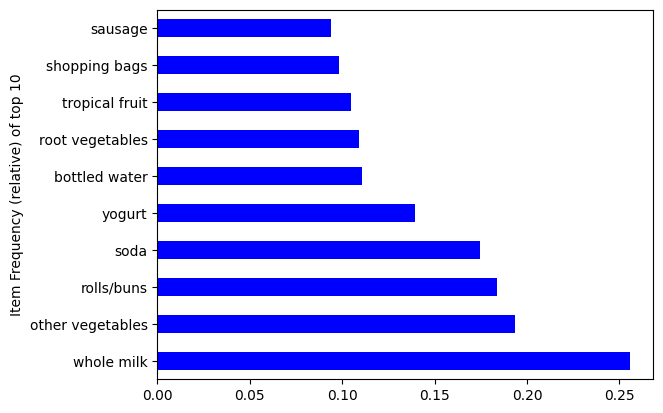

In [38]:
itemFreq = df.sum(axis=0)/len(df)
ax = itemFreq.nlargest(10).plot.barh(color='blue')
plt.ylabel("Item Frequency (relative) of top 10")
plt.show()

In [34]:
itemsets = apriori(df, min_support = 0.001,use_colnames=True)

rules = association_rules(itemsets, metric= 'confidence', min_threshold = 0.6)

print(rules[['antecedents','consequents','support','confidence','lift']])

                                            antecedents         consequents  \
0                                             (cereals)        (whole milk)   
1                                               (honey)        (whole milk)   
2                                                (rice)        (whole milk)   
3                         (Instant food products, soda)    (hamburger meat)   
4                       (Instant food products, yogurt)        (whole milk)   
...                                                 ...                 ...   
2956  (tropical fruit, yogurt, pip fruit, root veget...  (other vegetables)   
2957  (tropical fruit, yogurt, other vegetables, rol...        (whole milk)   
2958  (tropical fruit, other vegetables, rolls/buns,...            (yogurt)   
2959  (tropical fruit, yogurt, other vegetables, whi...        (whole milk)   
2960  (tropical fruit, yogurt, whipped/sour cream, r...  (other vegetables)   

       support  confidence       lift  
0     0.003

In [35]:
rules.sort_values(by = 'lift', ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2951,"(oil, tropical fruit, whole milk, other vegeta...","(root vegetables, yogurt)",0.001525,0.025826,0.001017,0.666667,25.813648,0.000977,2.922522,0.962729
3,"(Instant food products, soda)",(hamburger meat),0.001932,0.033249,0.001220,0.631579,18.995654,0.001156,2.624040,0.949190
2954,"(oil, root vegetables, yogurt, whole milk)","(tropical fruit, other vegetables)",0.001525,0.035892,0.001017,0.666667,18.574127,0.000962,2.892323,0.947607
2437,"(tropical fruit, white bread, butter)","(yogurt, other vegetables)",0.001322,0.043416,0.001017,0.769231,17.717528,0.000959,4.145196,0.944808
2953,"(oil, root vegetables, yogurt, other vegetables)","(tropical fruit, whole milk)",0.001423,0.042298,0.001017,0.714286,16.887019,0.000957,3.351957,0.942124
461,"(popcorn, soda)",(salty snack),0.001932,0.037824,0.001220,0.631579,16.697793,0.001147,2.611620,0.941932


In [30]:
rules_df = rules.sort_values(by = ['lift','confidence'], ascending=False)
relv_rules = rules_df[rules_df['lift']>1]
relv_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2951,"(oil, tropical fruit, whole milk, other vegeta...","(root vegetables, yogurt)",0.001525,0.025826,0.001017,0.666667,25.813648,0.000977,2.922522,0.962729
3,"(Instant food products, soda)",(hamburger meat),0.001932,0.033249,0.001220,0.631579,18.995654,0.001156,2.624040,0.949190
2954,"(oil, root vegetables, yogurt, whole milk)","(tropical fruit, other vegetables)",0.001525,0.035892,0.001017,0.666667,18.574127,0.000962,2.892323,0.947607
2437,"(tropical fruit, white bread, butter)","(yogurt, other vegetables)",0.001322,0.043416,0.001017,0.769231,17.717528,0.000959,4.145196,0.944808
2953,"(oil, root vegetables, yogurt, other vegetables)","(tropical fruit, whole milk)",0.001423,0.042298,0.001017,0.714286,16.887019,0.000957,3.351957,0.942124
...,...,...,...,...,...,...,...,...,...,...
2234,"(tropical fruit, whipped/sour cream, root vege...",(whole milk),0.004575,0.255516,0.002745,0.600000,2.348189,0.001576,1.861210,0.576779
2590,"(tropical fruit, curd, root vegetables, other ...",(whole milk),0.002034,0.255516,0.001220,0.600000,2.348189,0.000701,1.861210,0.575310
2663,"(tropical fruit, frozen vegetables, yogurt, ot...",(whole milk),0.002034,0.255516,0.001220,0.600000,2.348189,0.000701,1.861210,0.575310
2868,"(whipped/sour cream, sausage, yogurt, other ve...",(whole milk),0.002034,0.255516,0.001220,0.600000,2.348189,0.000701,1.861210,0.575310
